In [3]:
from sklearn.datasets import fetch_california_housing 
import pandas as pd
import numpy as np

In [4]:
data = fetch_california_housing()


In [5]:

# Inspect the structure
print("Type of data object:", type(data))
print("\nKeys inside the dataset:", data.keys())

# Check the shape of the feature matrix
print("\nShape of data.data (features):", data.data.shape)

# Check column names
print("\nFeature names:", data.feature_names)

# Check the shape of the target array
print("\nShape of target (prices):", data.target.shape)

print("fjidsak\n",data.data)

Type of data object: <class 'sklearn.utils._bunch.Bunch'>

Keys inside the dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Shape of data.data (features): (20640, 8)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Shape of target (prices): (20640,)
fjidsak
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

print("X shape: ", X.shape)
print("Y shape: ", y.shape)

X.head()

X shape:  (20640, 8)
Y shape:  (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)


X train shape (16512, 8)
X test shape (4128, 8)
y train shape (16512,)
y test shape (4128,)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train) 

print("Model trained")
print("Intercept (b0):", model.intercept_)
print("Coeffecients: ", model.coef_)

Model trained
Intercept (b0): -37.02327770606413
Coeffecients:  [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [15]:
y_pred = model.predict(X_test)

print("Predicted:", np.round(y_pred[:5], 3))
print("Actual:   ", y_test[:5])


Predicted: [0.719 1.764 2.71  2.839 2.605]
Actual:    [0.477   0.458   5.00001 2.186   2.78   ]


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root MSE (RMSE):", rmse)
print("R² score:", r2)

Mean Absolute Error (MAE): 0.5332001304956566
Mean Squared Error (MSE): 0.555891598695244
Root MSE (RMSE): 0.7455813830127761
R² score: 0.5757877060324511


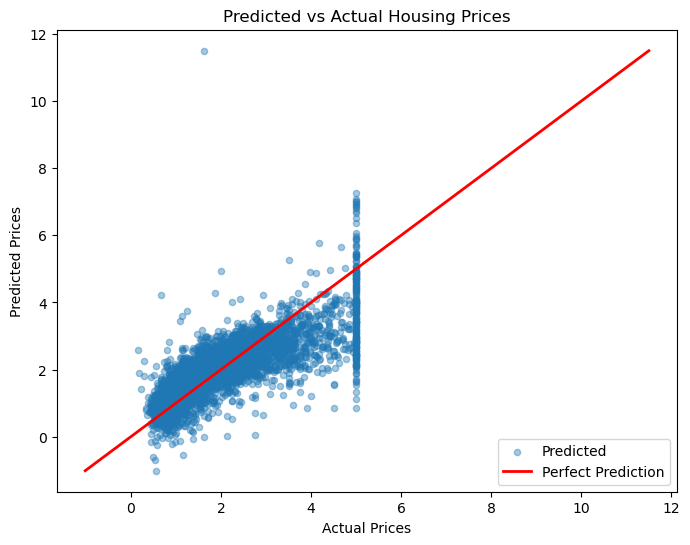

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, s=20, alpha=0.4, color='#1f77b4', label='Predicted')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Housing Prices")
plt.legend()

plt.show()
